        # Updated Excel

In [1]:
# import the relevant packages
from scipy.interpolate import *
from scipy import stats
from scipy.stats.mstats import winsorize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Set matplotlib inline
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [33]:
df = pd.read_csv('Set A.csv',encoding = "ISO-8859-1",index_col= [0])
print(df.head(3))

                            Year     cusip Ticker  Environment   Social   \
Company                                                                    
Agilent Technologies, Inc.  2000  00846U10      A             0        1   
Agilent Technologies, Inc.  2001  00846U10      A             0        1   
Agilent Technologies, Inc.  2002  00846U10      A             0        7   

                            Governance   SumofESG   New SUMofESG       P/B  \
Company                                                                      
Agilent Technologies, Inc.           -2          5            -1  3.993307   
Agilent Technologies, Inc.           -2         -4            -1  1.814184   
Agilent Technologies, Inc.            0          0             7  1.387778   

                                 ROA  Leverage      SG&A       ROE       R&D  \
Company                                                                        
Agilent Technologies, Inc.  0.197281  0.375074  0.770022  0.203989  

In [34]:
df.describe()

,Year,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy
count,25262.000000,25262.000000,25262.000000,25262.000000,25262.00000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000
mean,2008.008590,0.116499,0.275948,-0.334692,-0.02668,0.057755,3.361883,0.082374,0.817012,0.149319,0.249743,0.019265,0.046465,0.177892,0.866566,34.115470
std,5.869627,0.946244,2.060171,0.784968,2.47678,2.692733,42.779266,0.089468,0.499557,0.183769,2.631197,0.047746,0.079022,0.266501,0.862108,20.845058
min,1991.000000,-5.000000,-9.000000,-5.000000,-12.00000,-12.000000,0.000000,-0.762097,0.000000,-0.042283,-265.494845,0.000000,-0.029157,0.000000,-0.227219,10.000000
25%,2004.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,1.008921,0.020207,0.486426,0.007433,0.084628,0.000000,0.003463,0.007495,0.257756,13.000000
50%,2009.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.787980,0.069186,0.651254,0.083990,0.171030,0.000000,0.027363,0.068914,0.665520,34.000000
75%,2013.000000,0.000000,1.000000,0.000000,1.00000,1.000000,2.979255,0.125211,0.966112,0.230884,0.283129,0.015105,0.060195,0.270880,1.182436,49.000000
max,2016.000000,6.000000,15.000000,2.000000,20.00000,20.000000,5603.074227,1.216186,2.869038,1.917843,233.176471,1.792264,5.598592,9.914449,13.490562,99.000000


In [35]:
df.columns = df.columns.str.strip() #removewhitespaces

In [36]:
df_win = df.copy()

In [37]:
df_win["Environment"] = winsorize(df_win["Environment"], (0.01, 0.01))
df_win["Social"] = winsorize(df_win["Social"], (0.01, 0.01))
df_win["Governance"] = winsorize(df_win["Governance"], (0.01, 0.01))
df_win["SumofESG"] = winsorize(df_win["SumofESG"], (0.01, 0.01))
df_win["P/B"] = winsorize(df_win["P/B"], (0.01, 0.01))
df_win["ROA"] = winsorize(df_win["ROA"], (0.01, 0.01))
df_win["Leverage"] = winsorize(df_win["Leverage"], (0.01, 0.01))
df_win["SG&A"] = winsorize(df_win["SG&A"], (0.01, 0.01))
df_win["ROE"] = winsorize(df_win["ROE"], (0.01, 0.01))
df_win["R&D"] = winsorize(df_win["R&D"], (0.01, 0.01))
df_win["CAPEX"] = winsorize(df_win["CAPEX"], (0.01, 0.01))
df_win["Intangible"] = winsorize(df_win["Intangible"], (0.01, 0.01))
df_win["Revenue"] = winsorize(df_win["Revenue"], (0.01, 0.01))

In [38]:
df_win.describe()

,Year,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy
count,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000
mean,2008.008590,0.117607,0.268902,-0.333782,-0.032974,0.057755,2.521612,0.082477,0.816977,0.147582,0.218083,0.018385,0.044439,0.171644,0.855235,34.115470
std,5.869627,0.915615,1.981750,0.770368,2.371411,2.692733,3.050541,0.081237,0.497580,0.176065,0.267501,0.040559,0.056832,0.218855,0.794958,20.845058
min,1991.000000,-3.000000,-4.000000,-3.000000,-6.000000,-12.000000,0.000000,-0.122516,0.119374,0.000000,-0.405706,0.000000,0.000000,0.000000,0.038857,10.000000
25%,2004.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.008921,0.020207,0.486426,0.007433,0.084628,0.000000,0.003463,0.007495,0.257756,13.000000
50%,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.787980,0.069186,0.651254,0.083990,0.171030,0.000000,0.027363,0.068914,0.665520,34.000000
75%,2013.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.979255,0.125211,0.966112,0.230884,0.283129,0.015105,0.060195,0.270880,1.182436,49.000000
max,2016.000000,4.000000,7.000000,1.000000,8.000000,20.000000,20.814432,0.352390,1.881904,0.768778,1.784969,0.212959,0.321436,0.984274,4.056562,99.000000


In [39]:
df_win.tail()

,Year,cusip,Ticker,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy
Company,,,,,,,,,,,,,,,,,,
Zoran Corporation,2010,98975F10,ZRAN,0,-2,0,0,-2,1.073308,-0.057724,0.208737,0.393153,-0.079432,0.209423,0.011938,0.097429,0.646824,36
ZOETIS INC.,2013,98978V10,ZTS,0,-1,0,-4,-1,16.990644,0.180613,0.853309,0.289843,1.175676,0.063718,0.029384,0.285053,0.732034,28
ZOETIS INC.,2014,98978V10,ZTS,1,1,1,-3,3,16.134737,0.177493,0.797639,0.290942,0.870606,0.061299,0.027447,0.259683,0.734523,28
ZOETIS INC.,2015,98978V10,ZTS,2,0,1,-3,3,20.814432,0.195702,0.862126,0.266535,1.185151,0.055396,0.033903,0.400333,0.724837,28
ZOETIS INC.,2016,98978V10,ZTS,1,1,0,2,2,17.600086,0.187539,0.804027,0.215215,0.989993,0.047517,0.027297,0.342348,0.621509,28


In [40]:
df_win["newSumofESG"] = df_win["Environment"] + df_win["Social"] + df_win["Governance"]
df_win.drop(columns=["SumofESG","New SUMofESG"])
df_win.head()

,Year,cusip,Ticker,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy,newSumofESG
Company,,,,,,,,,,,,,,,,,,,
"Agilent Technologies, Inc.",2000,00846U10,A,0,1,-2,5,-1,3.993307,0.197281,0.375074,0.768778,0.203989,0.212959,0.151359,0.102314,1.978876,38,-1
"Agilent Technologies, Inc.",2001,00846U10,A,0,1,-2,-4,-1,1.814184,-0.065282,0.291385,0.458042,-0.097190,0.160119,0.104570,0.127003,0.996558,38,-1
"Agilent Technologies, Inc.",2002,00846U10,A,0,7,0,0,7,1.387778,-0.122516,0.435938,0.458177,-0.244867,0.146381,0.037691,0.085775,0.752567,38,7
"Agilent Technologies, Inc.",2003,00846U10,A,0,2,-1,-2,1,4.200397,-0.043033,0.551532,0.336218,-0.125000,0.128124,0.024991,0.049006,0.738266,38,1
"Agilent Technologies, Inc.",2004,00846U10,A,0,3,-1,-1,2,3.392889,0.090043,0.490221,0.417659,0.157631,0.145625,0.018739,0.070351,1.140384,38,2


In [41]:
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [42]:
df_win['P/B'].dropna()
df_win['SumofESG'].dropna()

Company
Agilent Technologies, Inc.    5
Agilent Technologies, Inc.   -4
Agilent Technologies, Inc.    0
Agilent Technologies, Inc.   -2
Agilent Technologies, Inc.   -1
                             ..
Zoran Corporation             0
ZOETIS INC.                  -4
ZOETIS INC.                  -3
ZOETIS INC.                  -3
ZOETIS INC.                   2
Name: SumofESG, Length: 25262, dtype: int64

In [43]:
df_win_new = df_win.drop(['SumofESG','New SUMofESG'], axis=1)

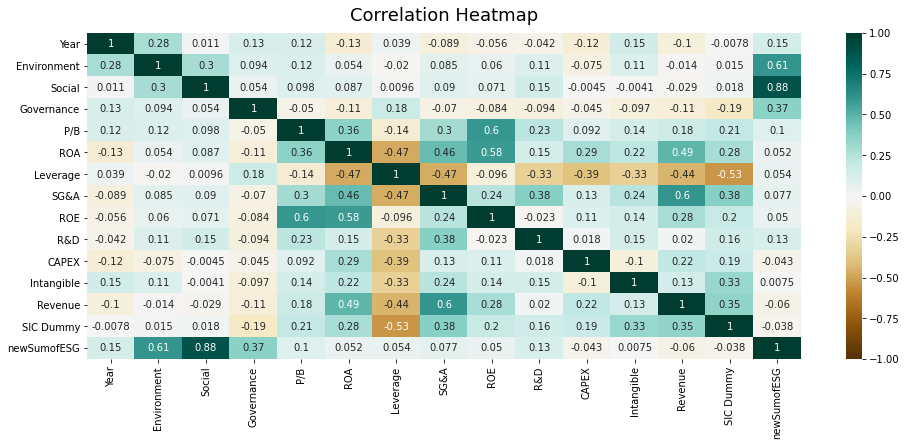

In [44]:
##correlation heatmap

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_win_new.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [45]:
df_win_new.corr().head(12)

,Year,Environment,Social,Governance,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy,newSumofESG
Year,1.000000,0.281948,0.011131,0.128707,0.123317,-0.134670,0.038583,-0.088703,-0.055965,-0.041805,-0.123700,0.154695,-0.100196,-0.007752,0.146250
Environment,0.281948,1.000000,0.295225,0.093875,0.115793,0.053999,-0.019902,0.084635,0.059656,0.105923,-0.075240,0.111436,-0.014188,0.015039,0.606407
Social,0.011131,0.295225,1.000000,0.054255,0.097601,0.086594,0.009629,0.089580,0.071083,0.153903,-0.004519,-0.004077,-0.028611,0.018353,0.884308
Governance,0.128707,0.093875,0.054255,1.000000,-0.049537,-0.113426,0.180337,-0.070118,-0.084401,-0.093731,-0.044971,-0.096811,-0.110918,-0.194294,0.371571
P/B,0.123317,0.115793,0.097601,-0.049537,1.000000,0.360762,-0.137388,0.297278,0.597136,0.233797,0.092294,0.143933,0.178700,0.207789,0.100726
ROA,-0.134670,0.053999,0.086594,-0.113426,0.360762,1.000000,-0.468994,0.464887,0.579606,0.146336,0.285371,0.219236,0.486807,0.282725,0.051532
Leverage,0.038583,-0.019902,0.009629,0.180337,-0.137388,-0.468994,1.000000,-0.465400,-0.096055,-0.325150,-0.391939,-0.325177,-0.442022,-0.532659,0.053889
SG&A,-0.088703,0.084635,0.089580,-0.070118,0.297278,0.464887,-0.465400,1.000000,0.238277,0.377362,0.130691,0.237960,0.601665,0.380670,0.077489
ROE,-0.055965,0.059656,0.071083,-0.084401,0.597136,0.579606,-0.096055,0.238277,1.000000,-0.023036,0.114500,0.141149,0.283543,0.199804,0.050298
R&D,-0.041805,0.105923,0.153903,-0.093731,0.233797,0.146336,-0.325150,0.377362,-0.023036,1.000000,0.017774,0.145121,0.019786,0.158821,0.127132


In [46]:
#Convert SIC Dummy column to dummy variables

df_win_dummy = pd.get_dummies(prefix='SIC', data=df_win['SIC Dummy'])
df_win_dummy

,SIC_10,SIC_12,SIC_13,SIC_14,SIC_15,SIC_16,SIC_17,SIC_20,SIC_21,SIC_22,...,SIC_73,SIC_75,SIC_78,SIC_79,SIC_80,SIC_82,SIC_83,SIC_87,SIC_88,SIC_99
Company,,,,,,,,,,,,,,,,,,,,,
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoran Corporation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZOETIS INC.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZOETIS INC.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_win_dummy = df_win_dummy.astype(float)

In [64]:
df_win_years = pd.get_dummies(prefix='Y', data=df_win['Year'])
df_win_years

,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,Y_1998,Y_1999,Y_2000,...,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016
Company,,,,,,,,,,,,,,,,,,,,,
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoran Corporation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ZOETIS INC.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ZOETIS INC.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
#joining SIC dummy variables to existing dataframe 

new_df = pd.concat([df_win_new, df_win_dummy, df_win_years], axis=1)
new_df

,Year,cusip,Ticker,Environment,Social,Governance,P/B,ROA,Leverage,SG&A,...,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016
Company,,,,,,,,,,,,,,,,,,,,,
"Agilent Technologies, Inc.",2000,00846U10,A,0,1,-2,3.993307,0.197281,0.375074,0.768778,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",2001,00846U10,A,0,1,-2,1.814184,-0.065282,0.291385,0.458042,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",2002,00846U10,A,0,7,0,1.387778,-0.122516,0.435938,0.458177,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",2003,00846U10,A,0,2,-1,4.200397,-0.043033,0.551532,0.336218,...,0,0,0,0,0,0,0,0,0,0
"Agilent Technologies, Inc.",2004,00846U10,A,0,3,-1,3.392889,0.090043,0.490221,0.417659,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoran Corporation,2010,98975F10,ZRAN,0,-2,0,1.073308,-0.057724,0.208737,0.393153,...,0,0,0,1,0,0,0,0,0,0
ZOETIS INC.,2013,98978V10,ZTS,0,-1,0,16.990644,0.180613,0.853309,0.289843,...,0,0,0,0,0,0,1,0,0,0
ZOETIS INC.,2014,98978V10,ZTS,1,1,1,16.134737,0.177493,0.797639,0.290942,...,0,0,0,0,0,0,0,1,0,0


In [50]:
##winsorized data 

new_df.describe()

,Year,Environment,Social,Governance,P/B,ROA,Leverage,SG&A,ROE,R&D,...,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016
count,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,...,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000
mean,2008.008590,0.117607,0.268902,-0.333782,2.521612,0.082477,0.816977,0.147582,0.218083,0.018385,...,0.057873,0.059655,0.059299,0.061317,0.061001,0.064801,0.072916,0.075528,0.064603,0.059813
std,5.869627,0.915615,1.981750,0.770368,3.050541,0.081237,0.497580,0.176065,0.267501,0.040559,...,0.233509,0.236851,0.236187,0.239916,0.239336,0.246179,0.260003,0.264247,0.245829,0.237145
min,1991.000000,-3.000000,-4.000000,-3.000000,0.000000,-0.122516,0.119374,0.000000,-0.405706,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,-1.000000,-1.000000,1.008921,0.020207,0.486426,0.007433,0.084628,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,0.000000,0.000000,0.000000,1.787980,0.069186,0.651254,0.083990,0.171030,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,0.000000,1.000000,0.000000,2.979255,0.125211,0.966112,0.230884,0.283129,0.015105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,4.000000,7.000000,1.000000,20.814432,0.352390,1.881904,0.768778,1.784969,0.212959,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
new_df.columns.tolist()

['Year',
 'cusip',
 'Ticker',
 'Environment',
 'Social',
 'Governance',
 'P/B',
 'ROA',
 'Leverage',
 'SG&A',
 'ROE',
 'R&D',
 'CAPEX',
 'Intangible',
 'Revenue',
 'SIC Dummy',
 'newSumofESG',
 'SIC_10',
 'SIC_12',
 'SIC_13',
 'SIC_14',
 'SIC_15',
 'SIC_16',
 'SIC_17',
 'SIC_20',
 'SIC_21',
 'SIC_22',
 'SIC_23',
 'SIC_24',
 'SIC_25',
 'SIC_26',
 'SIC_27',
 'SIC_28',
 'SIC_29',
 'SIC_30',
 'SIC_31',
 'SIC_32',
 'SIC_33',
 'SIC_34',
 'SIC_35',
 'SIC_36',
 'SIC_37',
 'SIC_38',
 'SIC_39',
 'SIC_40',
 'SIC_41',
 'SIC_42',
 'SIC_44',
 'SIC_45',
 'SIC_46',
 'SIC_47',
 'SIC_48',
 'SIC_49',
 'SIC_50',
 'SIC_51',
 'SIC_52',
 'SIC_53',
 'SIC_54',
 'SIC_55',
 'SIC_56',
 'SIC_57',
 'SIC_58',
 'SIC_59',
 'SIC_70',
 'SIC_71',
 'SIC_72',
 'SIC_73',
 'SIC_75',
 'SIC_78',
 'SIC_79',
 'SIC_80',
 'SIC_82',
 'SIC_83',
 'SIC_87',
 'SIC_88',
 'SIC_99',
 'Y_1991',
 'Y_1992',
 'Y_1993',
 'Y_1994',
 'Y_1995',
 'Y_1996',
 'Y_1997',
 'Y_1998',
 'Y_1999',
 'Y_2000',
 'Y_2001',
 'Y_2002',
 'Y_2003',
 'Y_2004',
 'Y_

In [67]:
new_df = new_df.set_index('Year', append=True)

In [68]:
new_df.head()

cusip Ticker  Environment  Social  \
Company                    Year                                         
Agilent Technologies, Inc. 2000  00846U10      A            0       1   
                           2001  00846U10      A            0       1   
                           2002  00846U10      A            0       7   
                           2003  00846U10      A            0       2   
                           2004  00846U10      A            0       3   

                                 Governance       P/B       ROA  Leverage  \
Company                    Year                                             
Agilent Technologies, Inc. 2000          -2  3.993307  0.197281  0.375074   
                           2001          -2  1.814184 -0.065282  0.291385   
                           2002           0  1.387778 -0.122516  0.435938   
                           2003          -1  4.200397 -0.043033  0.551532   
                           2004          -1  3.392889  0.090043  0.490221   

                                     SG&A       ROE  ...  Y_2007  Y_2008  \
Company                    Year                      ...                   
Agilent Technologies, Inc. 2000  0.768778  0.203989  ...       0       0   
                           2001  0.458042 -0.097190  ...       0       0   
                           2002  0.458177 -0.244867  ...       0       0   
                           2003  0.336218 -0.125000  ...       0       0   
                           2004  0.417659  0.157631  ...       0       0   

                                 Y_2009  Y_2010  Y_2011  Y_2012  Y_2013  \
Company                    Year                                           
Agilent Technologies, Inc. 2000       0       0       0       0       0   
                           2001       0       0       0       0       0   
                           2002       0       0       0       0       0   
                           2003       0       0       0       0       0   
                           2004       0       0       0       0       0   

                                 Y_2014  Y_2015  Y_2016  
Company                    Year                          
Agilent Technologies, Inc. 2000       0       0       0  
                           2001       0       0       0  
                           2002       0       0       0  
                           2003       0       0       0  
                           2004       0       0       0  

[5 rows x 101 columns]

In [20]:
## regression done on all variables as per normal

exog_vars = ['Environment','Social','Governance','Revenue','SG&A','ROA','ROE','R&D','CAPEX','Leverage','Intangible']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3232
Estimator:              RandomEffects   R-squared (Between):              0.4961
No. Observations:               25262   R-squared (Within):               0.2088
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4226
Time:                        20:57:39   Log-likelihood                -4.963e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1096.1
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                F(11,25250)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             985.56
                            

In [69]:
## regression inclusive for all SIC dummy variables

exog_vars = ['Environment','Social','Governance','SG&A','ROE','R&D','Leverage','Intangible', 'SIC_10','SIC_12','SIC_13',
             'SIC_14','SIC_15','SIC_16','SIC_17','SIC_20','SIC_21','SIC_22','SIC_23','SIC_24','SIC_25','SIC_26','SIC_27',
             'SIC_28','SIC_29','SIC_30','SIC_31','SIC_32','SIC_33','SIC_34','SIC_35','SIC_36','SIC_37','SIC_38','SIC_39',
             'SIC_40','SIC_41','SIC_42','SIC_44','SIC_45', 'SIC_46','SIC_47','SIC_48','SIC_49','SIC_50','SIC_51','SIC_52',
             'SIC_53','SIC_54','SIC_55','SIC_56','SIC_57','SIC_58','SIC_59','SIC_70','SIC_71','SIC_72','SIC_73','SIC_75',
             'SIC_78','SIC_79','SIC_80','SIC_82','SIC_83','SIC_87','SIC_88','SIC_99', 'Y_1991','Y_1992','Y_1993','Y_1994',
             'Y_1995','Y_1996','Y_1997','Y_1998','Y_1999','Y_2000','Y_2001','Y_2002','Y_2003','Y_2004','Y_2005','Y_2006',
             'Y_2007','Y_2008','Y_2009','Y_2010','Y_2011','Y_2012','Y_2013','Y_2014','Y_2015','Y_2016']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.4610
Estimator:              RandomEffects   R-squared (Between):              0.5474
No. Observations:               25262   R-squared (Within):               0.4008
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.5225
Time:                        21:48:20   Log-likelihood                -4.617e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      231.45
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                F(93,25168)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             216.24
                            

In [70]:
#removing ROA & CAPEX

exog_vars = ['Environment','Social','Governance','SG&A','ROE','R&D','Leverage','Intangible']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3144
Estimator:              RandomEffects   R-squared (Between):              0.4830
No. Observations:               25262   R-squared (Within):               0.2034
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4176
Time:                        21:49:28   Log-likelihood                -4.969e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1447.4
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                 F(8,25253)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             1298.6
                            

In [23]:
#including only ESG

exog_vars = ['Environment','Social','Governance']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.0289
Estimator:              RandomEffects   R-squared (Between):              0.0099
No. Observations:               25262   R-squared (Within):               0.0003
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.0112
Time:                        20:57:41   Log-likelihood                 -5.26e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      250.24
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                 F(3,25258)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             22.384
                            

In [71]:
#replacing individual esg components with new sumofesg

exog_vars = ['newSumofESG','SG&A','ROE','R&D','Leverage','Intangible']
exog = sm.add_constant(new_df[exog_vars])
endog = new_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

C:\Users\Sze Siang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3136
Estimator:              RandomEffects   R-squared (Between):              0.4840
No. Observations:               25262   R-squared (Within):               0.2020
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4183
Time:                        21:49:41   Log-likelihood                 -4.97e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1922.6
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                 F(6,25255)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             1724.7
                            